In [69]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import requests
import json
import pprint
import matplotlib
import matplotlib.pyplot as plt
from config import (aqs_api_key)
from config import (email_address)


# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
daily_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
annual_data_url = "https://aqs.epa.gov/data/api/annualData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"
Illinois = "17"

cali_data = []
hawaii_data = []
ny_data = []
dc19_data = []
dc20_data = []
mass19_data = []
mass20_data = []
illinois_nd_19_data = []
illinois_nd_20_data = []
illinois_sd_19_data = []
illinois_sd_20_data = []
illinois_cm_19_data = []
illinois_cm_20_data = []
illinois_pm_19_data = []
illinois_pm_20_data = []
illinois_oz_19_data = []
illinois_oz_20_data = []

In [10]:
# Create a DataFrame for California and pull carbon monoxide data from API
cali_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : California}

# Call to url
cali_response = requests.get(daily_data_url, params = cali_params).json()
cali_data.append(cali_response)

cali_df = pd.DataFrame(cali_data[0]["Data"])
cali_df.head()


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,06,013,1002,42101,1,38.006311,-121.641918,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Bethel Island,5551 BETHEL ISLAND RD,California,Contra Costa,Bethel Island,41860,"San Francisco-Oakland-Hayward, CA",2020-07-30
1,06,013,1002,42101,1,38.006311,-121.641918,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Bethel Island,5551 BETHEL ISLAND RD,California,Contra Costa,Bethel Island,41860,"San Francisco-Oakland-Hayward, CA",2020-07-30
2,06,013,1002,42101,1,38.006311,-121.641918,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Bethel Island,5551 BETHEL ISLAND RD,California,Contra Costa,Bethel Island,41860,"San Francisco-Oakland-Hayward, CA",2020-07-30
3,06,013,1002,42101,1,38.006311,-121.641918,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Bethel Island,5551 BETHEL ISLAND RD,California,Contra Costa,Bethel Island,41860,"San Francisco-Oakland-Hayward, CA",2020-07-30
4,06,013,1002,42101,1,38.006311,-121.641918,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Bethel Island,5551 BETHEL ISLAND RD,California,Contra Costa,Bethel Island,41860,"San Francisco-Oakland-Hayward, CA",2020-07-30


In [11]:
clean_cali_df=cali_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)


In [12]:
cali_df.isnull()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
cali_df.nsmallest(3, 'first_max_value')

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
4570,06,023,1004,42101,1,40.77678,-124.17949,NAD83,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Jacobs,717 SOUTH AVENUE,California,Humboldt,Eureka,21700,"Eureka-Arcata-Fortuna, CA",2020-08-14
3615,06,083,2004,42101,1,34.63782,-120.45750,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Lompoc H Street,"128 S 'H' ST, LOMPOC",California,Santa Barbara,Lompoc,42200,"Santa Maria-Santa Barbara, CA",2020-06-29
3526,06,083,2004,42101,1,34.63782,-120.45750,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Lompoc H Street,"128 S 'H' ST, LOMPOC",California,Santa Barbara,Lompoc,42200,"Santa Maria-Santa Barbara, CA",2020-06-29


In [15]:
#Illinois 2019 and 2020 ozone 44201

illinois_oz_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_oz_19_response = requests.get(daily_data_url, params = illinois_oz_19_params).json()
illinois_oz_19_data.append(illinois_oz_19_response)

illinois_oz_19_df = pd.DataFrame(illinois_oz_19_data[0]["Data"])

# create DF for Illinois 2020 and pull PM 2.5 from APi
illinois_oz_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_oz_20_response = requests.get(daily_data_url, params = illinois_oz_20_params).json()
illinois_oz_20_data.append(illinois_oz_20_response)

#create df for illinois 2020
illinois_oz_20_df = pd.DataFrame(illinois_oz_20_data[0]["Data"])
illinois_oz_20_df
#merge 2020
merge_illinois_oz_df = illinois_oz_19_df.append(illinois_oz_20_df)
merge_illinois_oz_df.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,17,031,0032,44201,1,41.755832,-87.54535,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,SOUTH WATER FILTRATION PLANT,3300 E. CHELTENHAM PL.,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2019-12-03
1,17,031,0032,44201,1,41.755832,-87.54535,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,SOUTH WATER FILTRATION PLANT,3300 E. CHELTENHAM PL.,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2019-12-03
2,17,031,0032,44201,1,41.755832,-87.54535,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,SOUTH WATER FILTRATION PLANT,3300 E. CHELTENHAM PL.,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2019-12-03
3,17,031,0032,44201,1,41.755832,-87.54535,WGS84,Ozone,1 HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,SOUTH WATER FILTRATION PLANT,3300 E. CHELTENHAM PL.,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2019-12-03
4,17,031,0032,44201,1,41.755832,-87.54535,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,SOUTH WATER FILTRATION PLANT,3300 E. CHELTENHAM PL.,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2019-12-03


In [16]:
#drop columns in Illinois DF. ozone Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_oz_clean_df = merge_illinois_oz_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_oz_clean_df.head()



#run ozone by 8 Hour Sample (used 24 hours because it provided a longer time frame, 8 hour only shows one year, 1 hour is nothing)
sample_duration_oz = illinois_oz_clean_df["sample_duration"] == "8-HR RUN AVG BEGIN HOUR"
sample_duration_oz

illinois_oz_clean_df = illinois_oz_clean_df[sample_duration_oz]
illinois_oz_clean_df.head()

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-02-28,2,8.0,0.033000,0.033,22,31.0,Illinois,Cook,Chicago
1,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-02-28,2,8.0,0.033000,0.033,22,31.0,Illinois,Cook,Chicago
2,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-02-28,2,12.0,0.033000,0.033,22,31.0,Illinois,Cook,Chicago
4,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-03-01,24,100.0,0.038042,0.041,13,38.0,Illinois,Cook,Chicago
5,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-03-01,24,100.0,0.038042,0.041,13,38.0,Illinois,Cook,Chicago


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,17,031,0076,88502,3,41.7514,-87.713488,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,COM ED MAINTENANCE BLDG,7801 LAWNDALE,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
1,17,031,0076,88502,3,41.7514,-87.713488,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,COM ED MAINTENANCE BLDG,7801 LAWNDALE,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
2,17,031,0076,88502,3,41.7514,-87.713488,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,COM ED MAINTENANCE BLDG,7801 LAWNDALE,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
3,17,031,0076,88502,3,41.7514,-87.713488,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,COM ED MAINTENANCE BLDG,7801 LAWNDALE,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
4,17,031,0076,88502,3,41.7514,-87.713488,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,COM ED MAINTENANCE BLDG,7801 LAWNDALE,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15


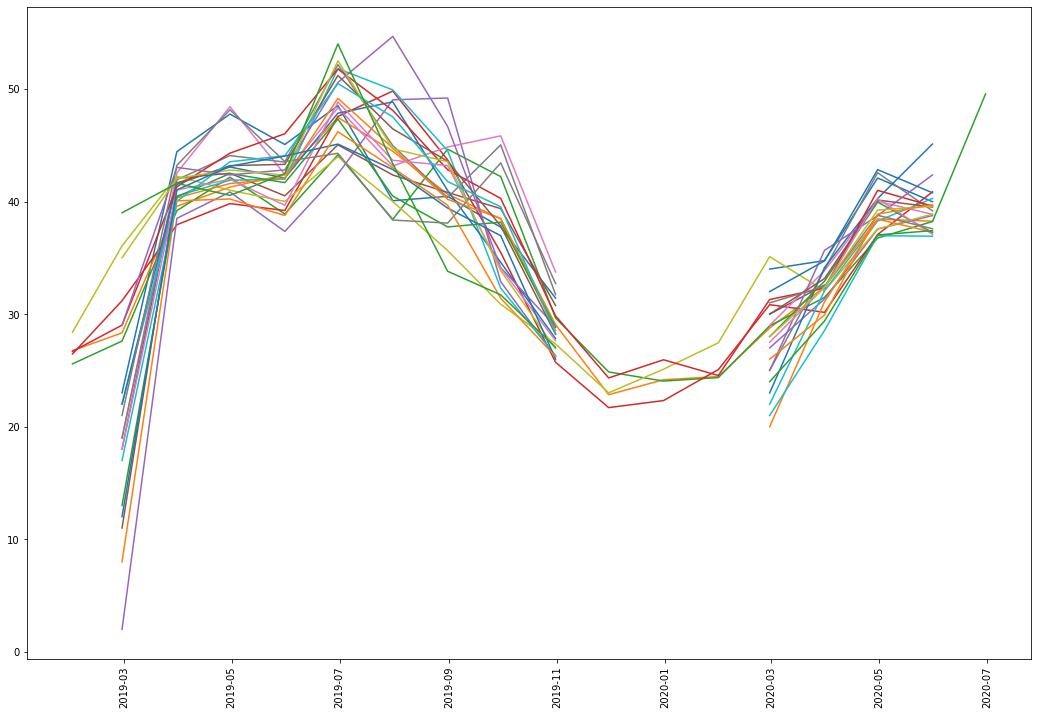

In [17]:
#group Iliinois data ozone in dataframe with groupby
illinois_oz_group = pd.DataFrame(illinois_oz_clean_df.groupby(["date_local","county"]).mean().unstack())
illinois_oz_group.index
#convert index to datetime
illinois_oz_group.index = pd.to_datetime(illinois_oz_group.index)
#average data by months
monthly_oz_averages = illinois_oz_group.resample('M').mean()

# #plot aqi against time for each county ozone in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_oz_averages.index
y_values = monthly_oz_averages['aqi']
plt.plot(x_values,y_values)
#needto add title, x axis labels include units of meausres, need to add legend for counties

#Illinois 2019 and 2020 PM2.5

illinois_pm_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_pm_19_response = requests.get(daily_data_url, params = illinois_pm_19_params).json()
illinois_pm_19_data.append(illinois_pm_19_response)

illinois_pm_19_df = pd.DataFrame(illinois_pm_19_data[0]["Data"])

# create DF for Illinois 2020 and pull PM 2.5 from APi
illinois_pm_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_pm_20_response = requests.get(daily_data_url, params = illinois_pm_20_params).json()
illinois_pm_20_data.append(illinois_pm_20_response)

#create df for illinois 2020
illinois_pm_20_df = pd.DataFrame(illinois_pm_20_data[0]["Data"])
illinois_pm_20_df
#merge 2020
merge_illinois_pm_df = illinois_pm_19_df.append(illinois_pm_20_df)
merge_illinois_pm_df.head()

In [18]:
#drop columns in Illinois DF.nitrogen dioxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_nd_clean_df = merge_illinois_nd_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_nd_clean_df.head()

#run nitrogen dioxideby 1 hour sample - only option
sample_duration_nd = illinois_nd_clean_df["sample_duration"] == "1 HOUR"
sample_duration_nd

illinois_nd_clean_df = illinois_nd_clean_df[sample_duration_nd]
illinois_nd_clean_df.head()

NameError: name 'merge_illinois_nd_df' is not defined

In [19]:
#group Iliinois data nitrogen dioxide in dataframe with groupby
illinois_nd_group = pd.DataFrame(illinois_nd_clean_df.groupby(["date_local","county"]).mean().unstack())
illinois_nd_group.index
#convert index to datetime
illinois_nd_group.index = pd.to_datetime(illinois_nd_group.index)
#average data by months
monthly_nd_averages = illinois_nd_group.resample('M').mean()

# #plot aqi against time for each county nitrogen dioxide in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_nd_averages.index
y_values = monthly_nd_averages['aqi']
plt.plot(x_values,y_values)
#needto add title, x axis labels include units of meausres, need to add legend for counties

NameError: name 'illinois_nd_clean_df' is not defined

In [20]:
# # Illinois 2019 and 2020 data for sulfur DIOXIDE

illinois_sd_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42401", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # # Call to url for Illinois 2019
illinois_sd_19_response = requests.get(daily_data_url, params = illinois_sd_19_params).json()
illinois_sd_19_data.append(illinois_sd_19_response)

illinois_sd_19_df = pd.DataFrame(illinois_sd_19_data[0]["Data"])

# # create DF for Illinois 2020 and pull sulfur Data from APi
illinois_sd_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42401", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

# #call url for Illinois 2020
illinois_sd_20_response = requests.get(daily_data_url, params = illinois_sd_20_params).json()
illinois_sd_20_data.append(illinois_sd_20_response)

# #create df for illinois 2020
illinois_sd_20_df = pd.DataFrame(illinois_sd_20_data[0]["Data"])
illinois_sd_20_df
#merge 2020
merge_illinois_sd_df = illinois_sd_19_df.append(illinois_sd_20_df)
merge_illinois_sd_df.head()

ConnectionError: HTTPSConnectionPool(host='aqs.epa.gov', port=443): Max retries exceeded with url: /data/api/dailyData/byState?email=edione78%40gwu.edu&key=silvercat51&param=42401&bdate=20200101&edate=20200731&state=17 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000021F47084D08>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [ ]:
# #drop columns in Illinois DF. Sulfur Dioxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_clean_sd_df = merge_illinois_sd_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_clean_sd_df

# isolate data to 1 hour hour duration only sulfur dioxide; 24 and 3 hour samples are null

sample_duration_sd = illinois_clean_sd_df["sample_duration"] == "1 HOUR"
sample_duration_sd

illinois_clean_sd_df = illinois_clean_sd_df[sample_duration_sd]
illinois_clean_sd_df.head()

#group Iliinois data sulfur dioxide in dataframe with groupby
illinois_group_sd = pd.DataFrame(illinois_clean_sd_df.groupby(["date_local","county"]).mean().unstack())
illinois_group_sd.index
#convert index to datetime
illinois_group_sd.index = pd.to_datetime(illinois_group_sd.index)
#average data by months
monthly_averages_sd = illinois_group_sd.resample('M').mean()


# #plot aqi against time for each county sulfur dioxide in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_averages_sd.index
y_values = monthly_averages_sd['aqi']
plt.plot(x_values,y_values)


In [ ]:
# Create a DataFrame for Illinois 2019 and pull carbon monoxide data from API
illinois_cm_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_cm_19_response = requests.get(daily_data_url, params = illinois_cm_19_params).json()
illinois_cm_19_data.append(illinois_cm_19_response)

illinois_cm_19_df = pd.DataFrame(illinois_cm_19_data[0]["Data"])

#create DF for Illinois 2020 and pull Carbon Monoxide Data from APi
illinois_cm_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_cm_20_response = requests.get(daily_data_url, params = illinois_cm_20_params).json()
illinois_cm_20_data.append(illinois_cm_20_response)

#create df for illinois 2020
illinois_cm_20_df = pd.DataFrame(illinois_cm_20_data[0]["Data"])
illinois_cm_20_df
#merge 2020
merge_illinois_cm_df = illinois_cm_19_df.append(illinois_cm_20_df)
merge_illinois_cm_df.head()

In [ ]:
#drop columns in Illinois DF. Carbon Monoxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_clean_cm_df = merge_illinois_cm_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_clean_cm_df.head()

# isolate data to 8 hour duration only carbond monoxide, 1 hour is null

sample_duration_cm = illinois_clean_cm_df["sample_duration"] == "8-HR RUN AVG END HOUR"
sample_duration_cm

illinois_clean_cm_df = illinois_clean_cm_df[sample_duration_cm]
illinois_clean_cm_df.head()

#group Iliinois carbon monoxide data in dataframe with groupby
illinois_group_cm= pd.DataFrame(illinois_clean_cm_df.groupby(["date_local","county"]).mean().unstack())
illinois_group_cm.index
#convert index to datetime
illinois_group_cm.index = pd.to_datetime(illinois_group_cm.index)
#average data by months
monthly_averages_cm = illinois_group_cm.resample('M').mean()
# elimiate nans
# illinois_cm_df =monthly_averages_cm.fillna(0)
# illinois_cm_df
# illinois_cm_df.index

#plot aqi against time for each county cardbon monoxide in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_averages_cm.index
y_values = monthly_averages_cm['aqi']
plt.plot(x_values,y_values)

In [147]:
import matplotlib.pylab as plt
import seaborn as sns
import datetime as dt
import warnings
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [97]:
# Create a DataFrame for District of Columbia and pull carbon monoxide data from API
dc_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : District_of_Columbia}

# Call to url
dc_response = requests.get(daily_data_url, params = dc_params).json()
dc_data.append(dc_response)

dc_df = pd.DataFrame(dc_data[0]["Data"])
dc_df.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
1,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
2,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
3,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
4,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05


In [98]:
#dc_df = dc_df.groupby(['parameter_code', 'date_local']).mean().reset_index

In [99]:
dc_df

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
1,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
2,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
3,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
4,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,11,001,0051,42101,1,38.894770,-76.953426,NAD83,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Near Road,3600 Benning Road N.E.,District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
726,11,001,0051,42101,1,38.894770,-76.953426,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Near Road,3600 Benning Road N.E.,District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
727,11,001,0051,42101,1,38.894770,-76.953426,NAD83,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Near Road,3600 Benning Road N.E.,District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
728,11,001,0051,42101,1,38.894770,-76.953426,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Near Road,3600 Benning Road N.E.,District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05


In [100]:
dc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state_code           730 non-null    object 
 1   county_code          730 non-null    object 
 2   site_number          730 non-null    object 
 3   parameter_code       730 non-null    object 
 4   poc                  730 non-null    int64  
 5   latitude             730 non-null    float64
 6   longitude            730 non-null    float64
 7   datum                730 non-null    object 
 8   parameter            730 non-null    object 
 9   sample_duration      730 non-null    object 
 10  pollutant_standard   730 non-null    object 
 11  date_local           730 non-null    object 
 12  units_of_measure     730 non-null    object 
 13  event_type           730 non-null    object 
 14  observation_count    730 non-null    int64  
 15  observation_percent  730 non-null    flo

In [101]:
dc_df = dc_df.dropna(subset=['aqi'])

In [102]:
dc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 1 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state_code           366 non-null    object 
 1   county_code          366 non-null    object 
 2   site_number          366 non-null    object 
 3   parameter_code       366 non-null    object 
 4   poc                  366 non-null    int64  
 5   latitude             366 non-null    float64
 6   longitude            366 non-null    float64
 7   datum                366 non-null    object 
 8   parameter            366 non-null    object 
 9   sample_duration      366 non-null    object 
 10  pollutant_standard   366 non-null    object 
 11  date_local           366 non-null    object 
 12  units_of_measure     366 non-null    object 
 13  event_type           366 non-null    object 
 14  observation_count    366 non-null    int64  
 15  observation_percent  366 non-null    flo

In [103]:
dc_df.date_local.value_counts()

2020-05-07    2
2020-02-09    2
2020-01-02    2
2020-04-10    2
2020-03-22    2
             ..
2020-03-27    2
2020-04-17    2
2020-05-31    2
2020-05-22    2
2020-05-17    2
Name: date_local, Length: 183, dtype: int64

In [104]:
dc_df.sample_duration.value_counts()

8-HR RUN AVG END HOUR    366
Name: sample_duration, dtype: int64

In [105]:
dc_df_mean = dc_df.groupby(['state', 'parameter_code', 'date_local']).mean()
dc_df_mean = dc_df_mean.drop(columns=['observation_count', 'observation_percent', 'poc'])

In [106]:
dc_df_mean.head(10)

latitude  longitude  \
state                parameter_code date_local                         
District Of Columbia 42101          2020-01-01  38.908309 -76.983302   
                                    2020-01-02  38.908309 -76.983302   
                                    2020-01-03  38.908309 -76.983302   
                                    2020-01-04  38.908309 -76.983302   
                                    2020-01-05  38.908309 -76.983302   
                                    2020-01-06  38.908309 -76.983302   
                                    2020-01-07  38.908309 -76.983302   
                                    2020-01-08  38.908309 -76.983302   
                                    2020-01-09  38.908309 -76.983302   
                                    2020-01-10  38.908309 -76.983302   

                                                arithmetic_mean  \
state                parameter_code date_local                    
District Of Columbia 42101          2020-01-01         0.239474   
                                    2020-01-02         0.735416   
                                    2020-01-03         0.302083   
                                    2020-01-04         0.329167   
                                    2020-01-05         0.195833   
                                    2020-01-06         0.331250   
                                    2020-01-07         0.522917   
                                    2020-01-08         0.245833   
                                    2020-01-09         0.262500   
                                    2020-01-10         0.333334   

                                                first_max_value  \
state                parameter_code date_local                    
District Of Columbia 42101          2020-01-01             0.60   
                                    2020-01-02             1.15   
                                    2020-01-03             0.50   
                                    2020-01-04             0.50   
                                    2020-01-05             0.40   
                                    2020-01-06             0.50   
                                    2020-01-07             0.95   
                                    2020-01-08             0.35   
                                    2020-01-09             0.35   
                                    2020-01-10             0.40   

                                                first_max_hour   aqi  
state                parameter_code date_local                        
District Of Columbia 42101          2020-01-01            23.0   7.0  
                                    2020-01-02             7.0  13.0  
                                    2020-01-03            21.5   6.0  
                                    2020-01-04             0.0   6.0  
                                    2020-01-05            22.5   4.5  
                                    2020-01-06             1.0   6.0  
                                    2020-01-07             9.0  11.0  
                                    2020-01-08             7.0   4.0  
                                    2020-01-09            11.5   4.0  
                                    2020-01-10             4.5   4.5

In [107]:
dc_df['parameter']

1      Carbon monoxide
3      Carbon monoxide
5      Carbon monoxide
7      Carbon monoxide
9      Carbon monoxide
            ...       
722    Carbon monoxide
724    Carbon monoxide
726    Carbon monoxide
728    Carbon monoxide
729    Carbon monoxide
Name: parameter, Length: 366, dtype: object

In [108]:
dc_df.index = pd.to_datetime(dc_df.index)

In [109]:
dc_df_monthly = dc_df.resample('M').mean()

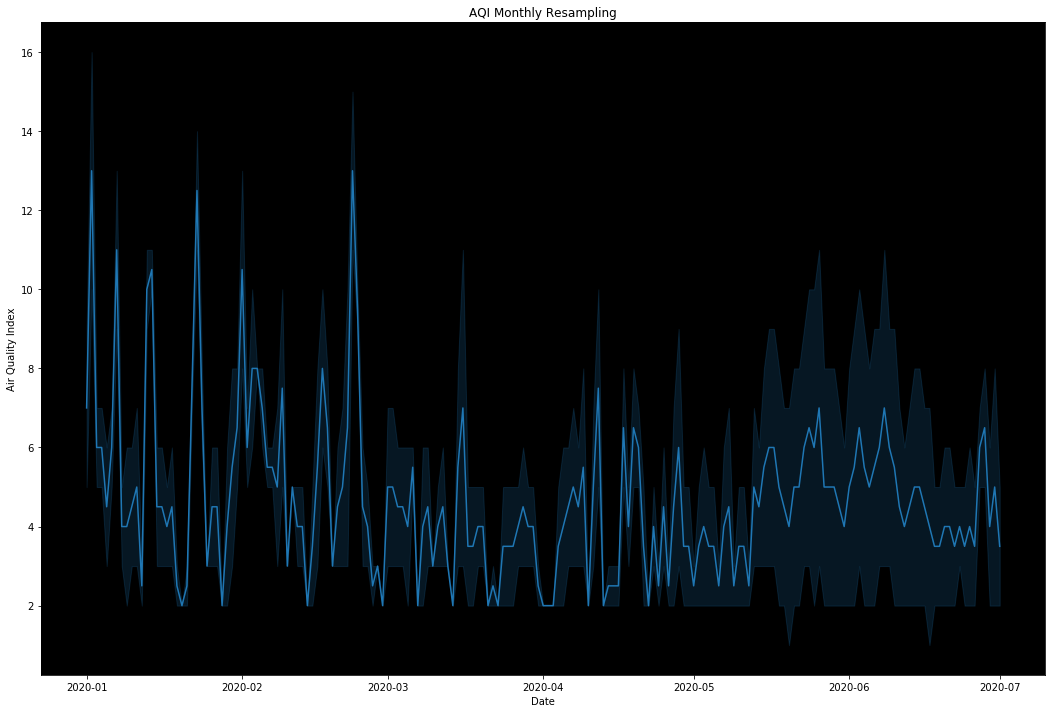

In [190]:
fig, ax = plt.subplots(figsize=(18, 12))
ax = plt.axes()
ax.set_facecolor('black')

sns.lineplot(x='date_local', y='aqi', data=dc_df, ax=ax)
ax.set_title('AQI Monthly Resampling')
ax.set_ylabel('Air Quality Index')
ax.set_xlabel('Date');

In [117]:
dc_df.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration',
       'pollutant_standard', 'date_local', 'units_of_measure', 'event_type',
       'observation_count', 'observation_percent', 'validity_indicator',
       'arithmetic_mean', 'first_max_value', 'first_max_hour', 'aqi',
       'method_code', 'method', 'local_site_name', 'site_address', 'state',
       'county', 'city', 'cbsa_code', 'cbsa', 'date_of_last_change'],
      dtype='object')

In [118]:
dc_df = dc_df.drop(
    columns=['latitude', 
             'longitude', 
             'state_code', 
             'first_max_value',
             'first_max_hour',
             'cbsa_code',
             'cbsa',
             'datum',
             'event_type',
             'method',
             'units_of_measure'])
dc_df.head()

,county_code,site_number,parameter_code,poc,parameter,sample_duration,pollutant_standard,date_local,observation_count,observation_percent,validity_indicator,arithmetic_mean,aqi,method_code,local_site_name,site_address,state,county,city,date_of_last_change
1970-01-01 00:00:00.000000001,001,0043,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2020-01-01,19,79.0,Y,0.205263,5.0,593,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,2020-08-05
1970-01-01 00:00:00.000000003,001,0043,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2020-01-02,24,100.0,Y,0.583333,10.0,593,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,2020-08-05
1970-01-01 00:00:00.000000005,001,0043,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2020-01-03,24,100.0,Y,0.254167,5.0,593,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,2020-08-05
1970-01-01 00:00:00.000000007,001,0043,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2020-01-04,24,100.0,Y,0.291667,5.0,593,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,2020-08-05
1970-01-01 00:00:00.000000009,001,0043,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2020-01-05,24,100.0,Y,0.208333,3.0,593,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,2020-08-05


In [121]:
dc_df.date_local = pd.to_datetime(dc_df.date_local)

In [151]:
dc_df_daily_means = dc_df.groupby('date_local').mean()

C:\Users\mamec\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


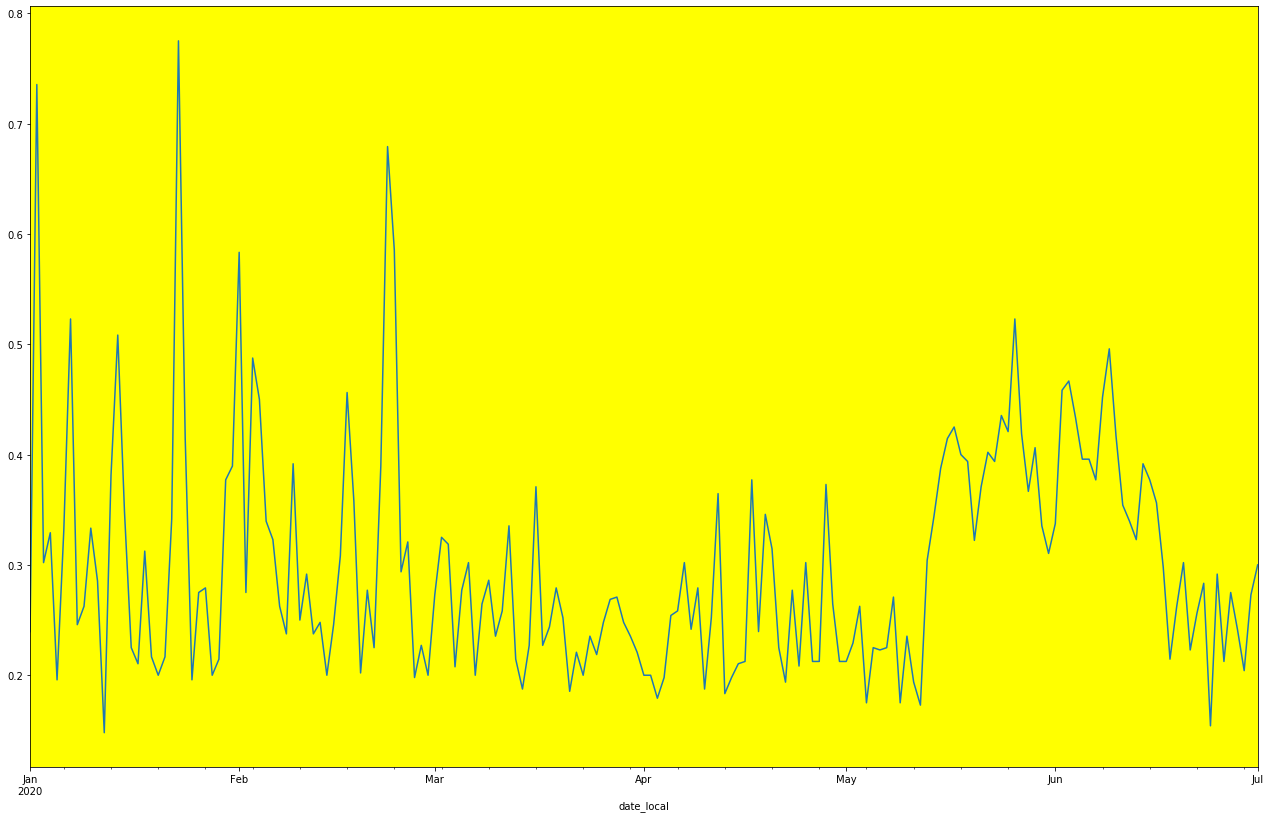

In [152]:
dc_df_daily_means.arithmetic_mean.plot(figsize=(22, 14));

ax = plt.axes()
ax.set_facecolor('yellow')

C:\Users\mamec\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


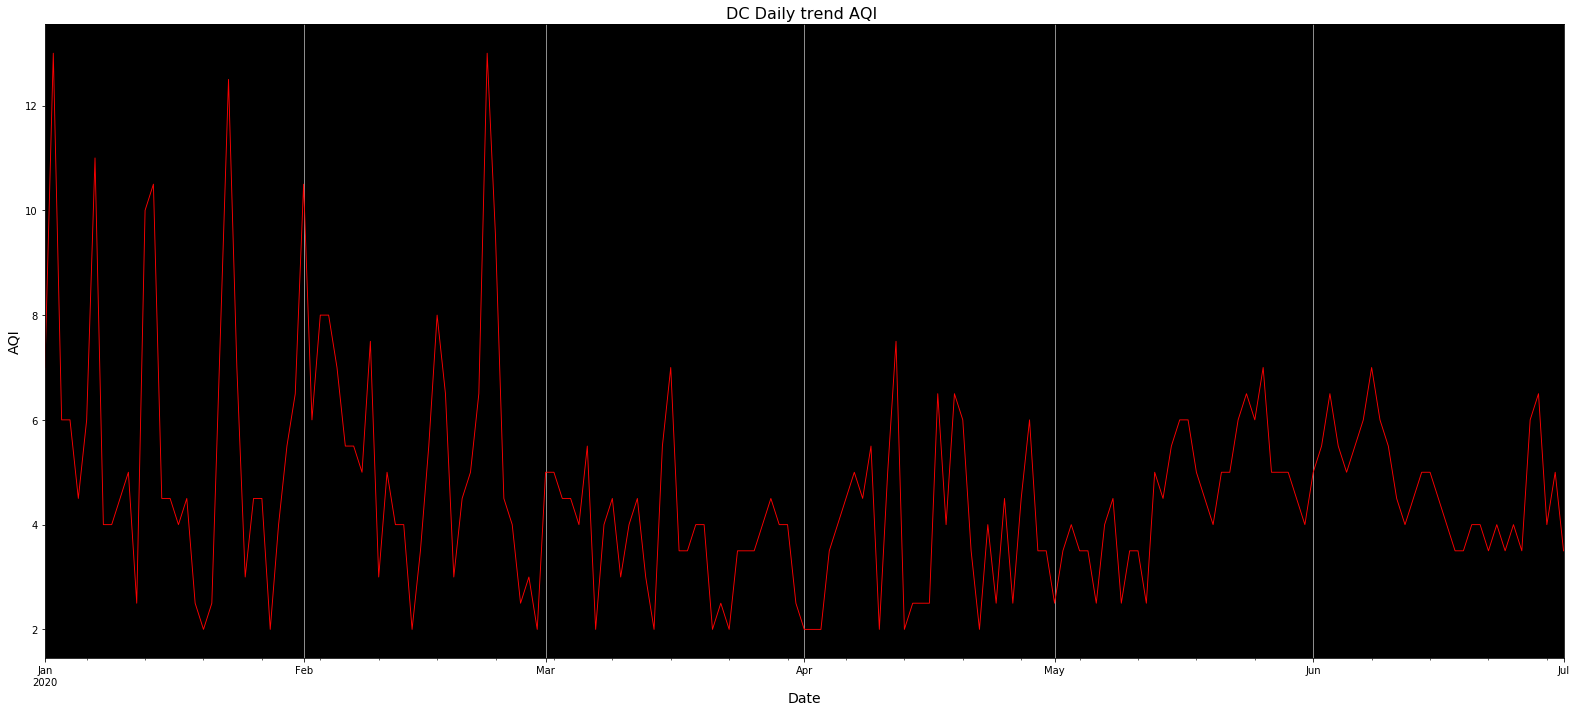

In [148]:
dc_df_daily_means.aqi.plot(figsize=(22,10), linewidth=.9,color='red',legend=False)

ax = plt.axes()
ax.set_facecolor('black')
plt.xlabel('Date',fontsize=14)
plt.ylabel('AQI',fontsize=14)
plt.title('DC Daily trend AQI ',fontsize=16)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

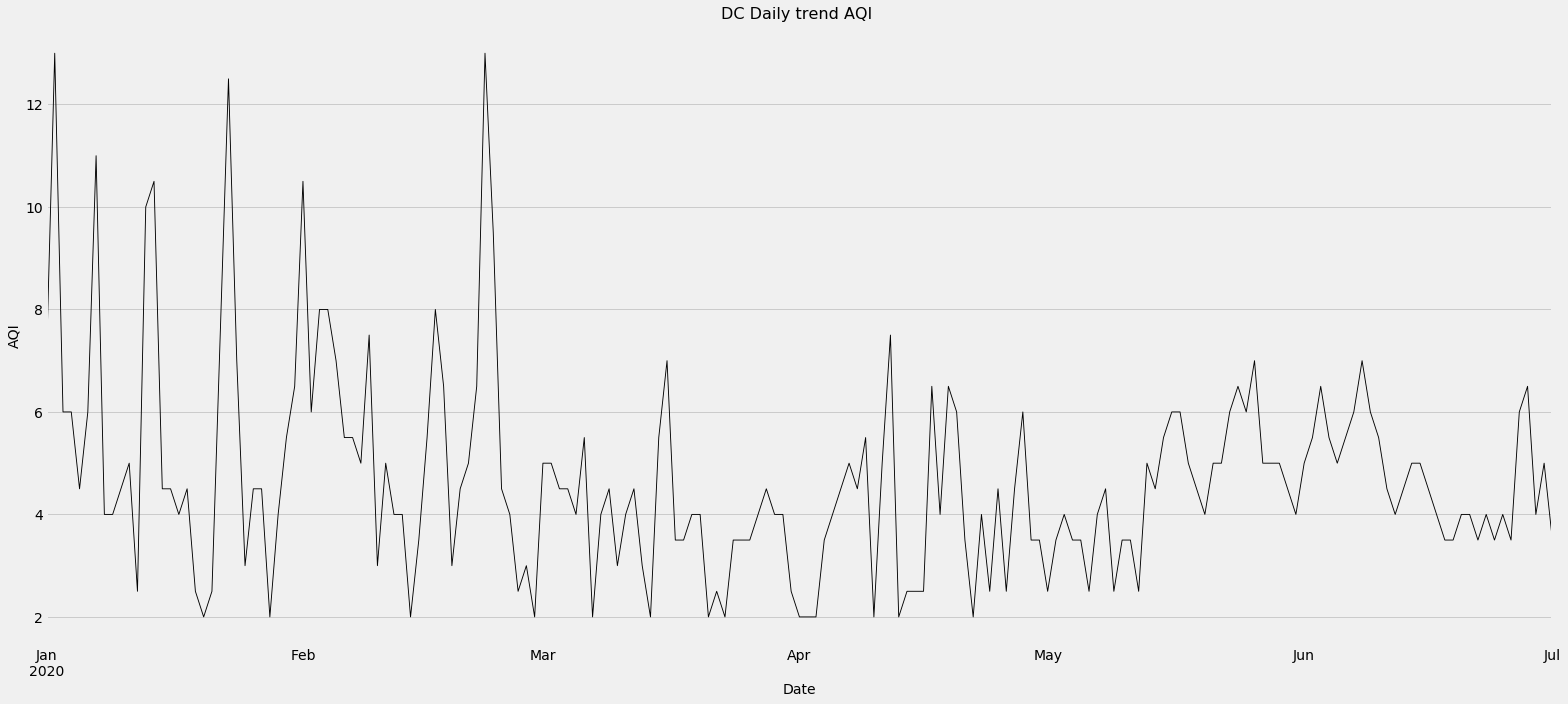

In [162]:
with plt.style.context('fivethirtyeight'):
    dc_df_daily_means.aqi.plot(figsize=(22,10),style='k-',linewidth=.9,legend=False)
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('AQI',fontsize=14)
    plt.title('DC Daily trend AQI ',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

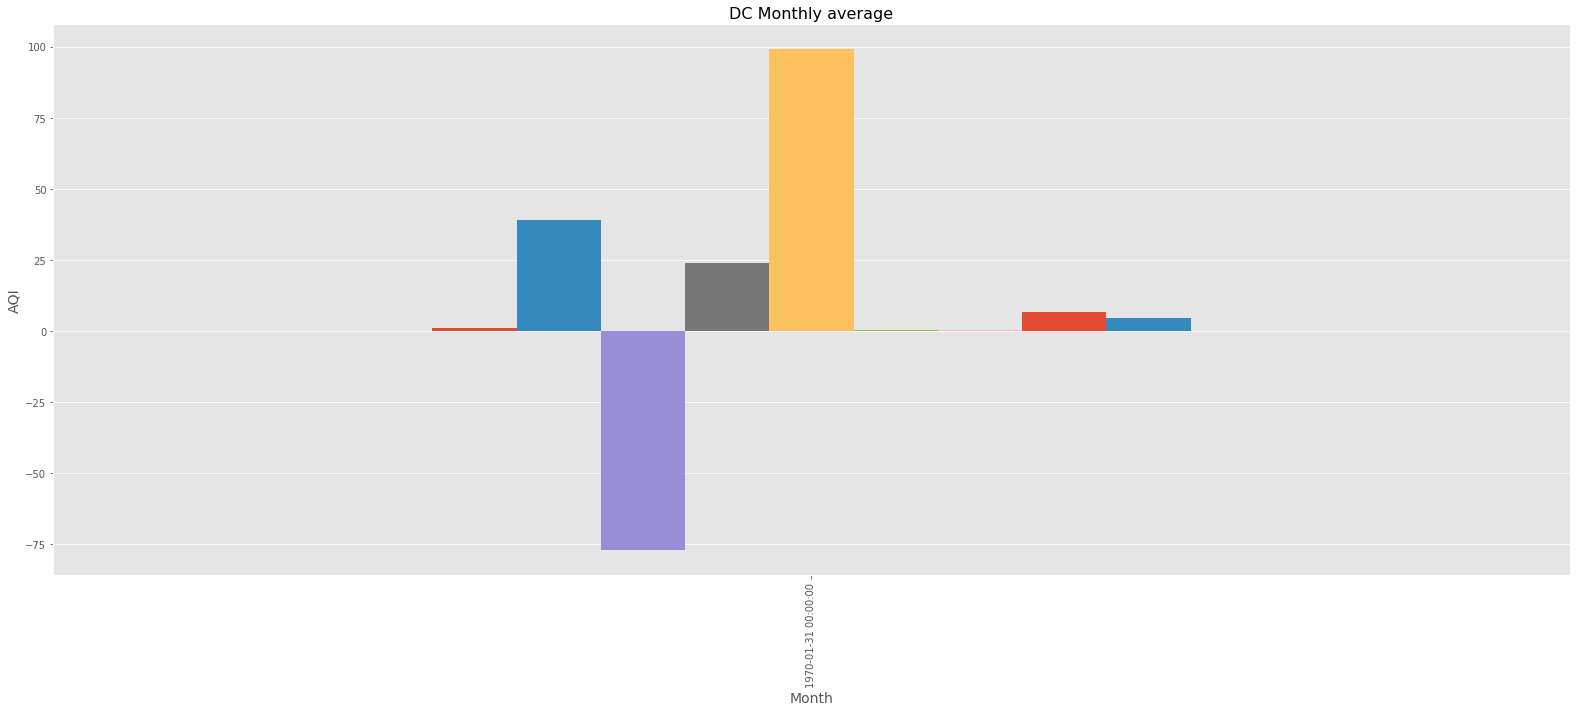

In [183]:
with plt.style.context('ggplot'):
    dc_df_monthly.plot(figsize=(22,10),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('AQI',fontsize=14)
    plt.title('DC Monthly average',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

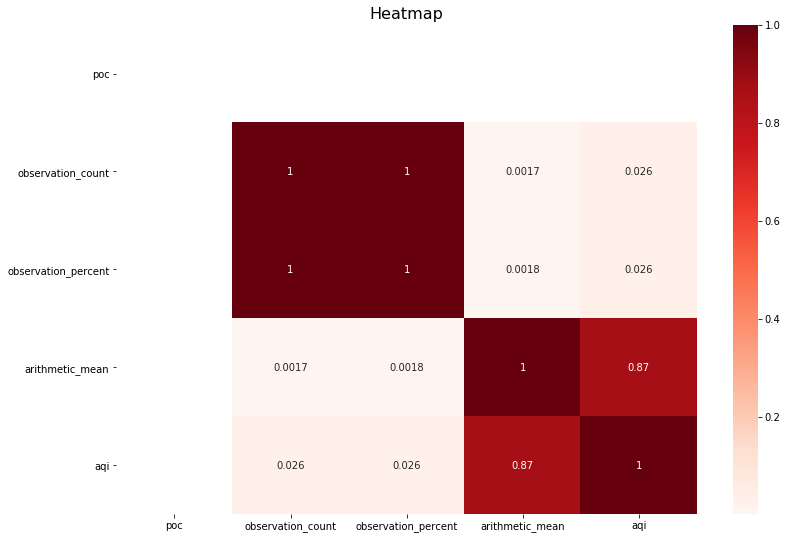

In [179]:
plt.figure(figsize=(13,9))
correlation_data = dc_df_daily_means
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap',fontsize=16)
plt.show()

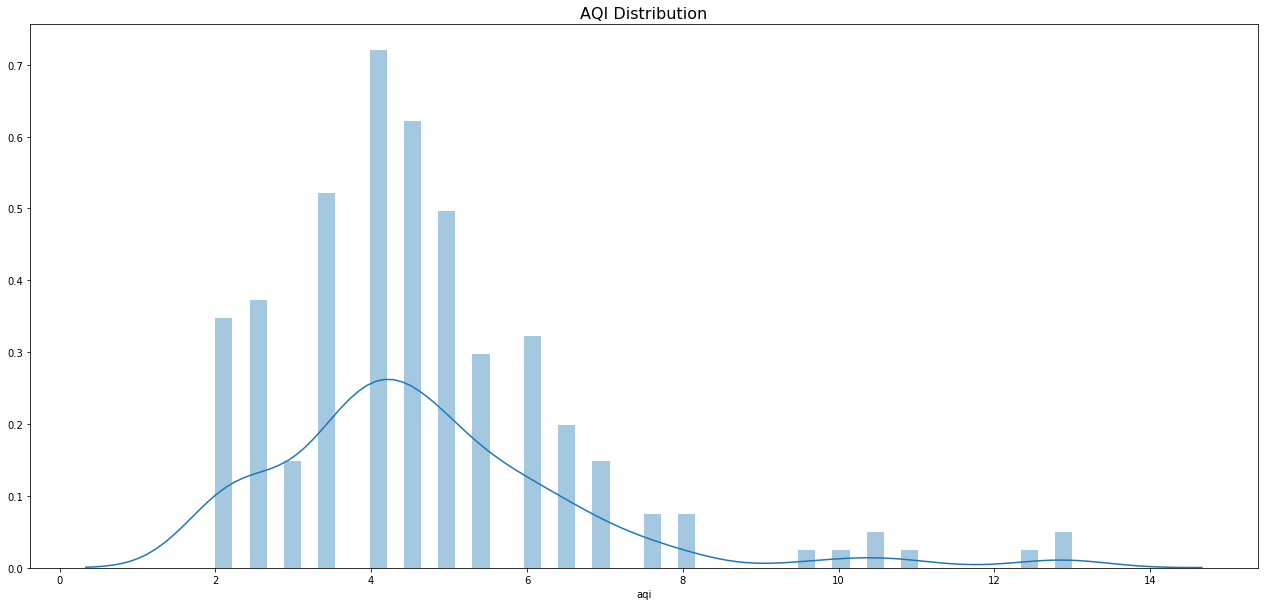

In [192]:
plt.figure(figsize=(22,10))
sns.distplot(dc_df_daily_means.aqi,bins=50)
plt.title('AQI Distribution',
         fontsize=16)
plt.show()

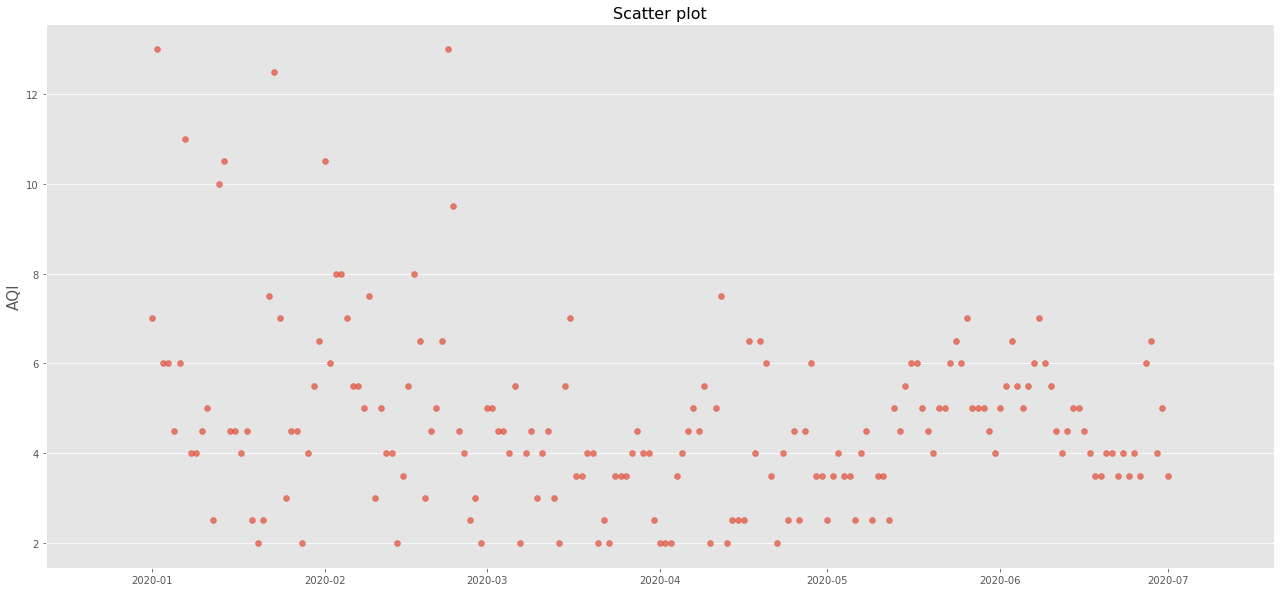

In [176]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(22,10))
    plt.scatter(dc_df_daily_means.aqi.index,dc_df_daily_means.aqi,alpha=.7)
    plt.title('Scatter plot',fontsize=16)
    plt.ylabel('AQI',fontsize=15)
    plt.grid(axis='x')
    plt.show()

In [ ]:
# Create a DataFrame for New York and pull carbon monoxide data from API
ny_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : New_York}

# Call to url
ny_response = requests.get(sample_data_url, params = ny_params).json()
ny_data.append(ny_response)

ny_df = pd.DataFrame(ny_data[0]["Data"])
ny_df.head()

In [ ]:
# Create a DataFrame for Mass and pull carbon monoxide data from API

# Pull from 2019 and 2020 to merge, api does not allow pulls from multiple years together.
#2019
mass_params19 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Massachusetts}

    # Call to url
mass19_response = requests.get(daily_data_url, params = mass_params19).json()
mass19_data.append(mass19_response)

mass19_df = pd.DataFrame(mass19_data[0]["Data"])

#2020
mass_params20 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200401", "state" : Massachusetts}

    # Call to url
mass20_response = requests.get(daily_data_url, params = mass_params20).json()
mass20_data.append(mass20_response)

mass20_df = pd.DataFrame(mass20_data[0]["Data"])

# Merge 2019 and 2020 data
merge_mass_df = mass19_df.append(mass20_df)
# merge_mass_df

In [ ]:
# Drop unnecessary columns to clean DF
clean_mass_df = merge_mass_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name",
                            "event_type","validity_indicator","method_code","state_code","county_code",
                            "site_number","parameter","pollutant_standard","units_of_measure","method",
                            "site_address","cbsa","observation_count","observation_percent"], axis=1)

# Filter out the 1-hour sample_duration and fix any null values
sample_duration = clean_mass_df['sample_duration'] == '8-HR RUN AVG END HOUR'
clean_mass_df = clean_mass_df[sample_duration]

# Groupby date and fix null values
group_mass = pd.DataFrame(clean_mass_df.groupby(['date_local', 'county']).mean().unstack())
# group_mass = group_mass.fillna(0)


In [ ]:
# Convert the date_local in the index into 'datetime' format
group_mass.index = pd.to_datetime(group_mass.index)

# Average out data on a per month basis
mass_monthly = group_mass.resample('M').mean()
mass_monthly.head()

In [ ]:
# Create first Line Chart for first_max_value of CO and data_local for Mass_df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 45)
xvalue = mass_monthly.index
yvalue = mass_monthly['aqi']

plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Massachusetts Carbon Monoxide AQI 2019-2020')
plt.plot(xvalue, yvalue)
plt.legend(yvalue)
